In [148]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.manifold import TSNE

In [203]:
pwd

'/Users/bellesig/Desktop/tagsets_190410'

In [172]:
def elog1(x):
    if x <= 0. or x >= 1.:
        return 0
    else:
        return x * (np.log(x))        

def H(p,base=2):
    return -sum(map(elog1,p)) / np.log(base)

In [149]:
df = pd.read_csv('Subset1_July_Tag_Dwell.csv')

In [150]:
# getting rid of the weirdos
df2 = df[(df.tag_level > -0.5) & (df.tag_level < 1.5) & (df.dwell_time > 0.0) & (df.dwell_time < 0.5)]

In [151]:
# this is to generate the different colors in the scatter plot
tagnames = list(df2.TAG)
color_tg = {'A':'black','C':'blue','T':'red','G':'yellow'}   

In [152]:
# generating different arrays
tag_all = np.array(df2.iloc[:,[0,1]],dtype=float)
tag_t = np.array(df2[df2.TAG == 'T'].iloc[:,[0,1]])
tag_a = np.array(df2[df2.TAG == 'A'].iloc[:,[0,1]])
tag_g = np.array(df2[df2.TAG == 'G'].iloc[:,[0,1]])
tag_c = np.array(df2[df2.TAG == 'C'].iloc[:,[0,1]])

### PCA

In [153]:
# PCA on standardized data
pca = PCA(n_components=2).fit(tag_all)
scaler = preprocessing.StandardScaler()
tag_all_scaled = preprocessing.scale(tag_all)
print(tag_all_scaled.mean(axis=0),tag_all_scaled.std(axis=0))
pca_scaled = PCA(n_components=2).fit(tag_all_scaled)

[2.32389414e-16 1.35560491e-16] [1. 1.]


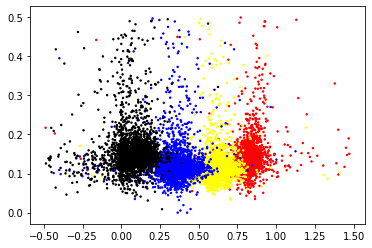

In [154]:
#scatter plot of the raw data (tag level vs dwell time)
plt.scatter(tag_all[:,0],tag_all[:,1],s=2,color=[ color_tg[i] for i in tagnames])

In [101]:
# printing the PCA components to check what kind of linear transformation we have
pca_scaled.components_

array([[-0.70710678,  0.70710678],
       [ 0.70710678,  0.70710678]])

In [130]:
# transform the data
tag_all_scaled_transform = pca.fit_transform(tag_all_scaled)

In [131]:
tag_all_scaled_transform_L = np.append(tag_all_scaled_transform,np.array(tagnames)[:,None],1)

In [160]:
tag_a_scaled = tag_all_scaled_transform[tag_all_scaled_transform_L[:,2] == 'A'][:,[0,1]]
tag_c_scaled = tag_all_scaled_transform[tag_all_scaled_transform_L[:,2] == 'C'][:,[0,1]]
tag_t_scaled = tag_all_scaled_transform[tag_all_scaled_transform_L[:,2] == 'T'][:,[0,1]]
tag_g_scaled = tag_all_scaled_transform[tag_all_scaled_transform_L[:,2] == 'G'][:,[0,1]]

In [161]:
tag_a_scaled

array([[ 1.07682948, -0.28019474],
       [ 6.04352633,  4.06565057],
       [ 0.89065225, -0.77668146],
       ...,
       [ 1.592748  , -0.23921883],
       [ 0.45974202, -1.76715395],
       [ 0.91656047, -0.60623069]])

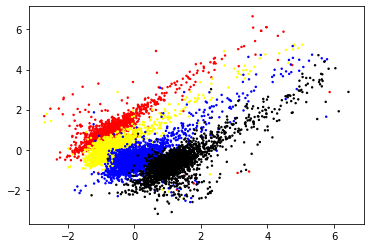

In [162]:
# transformed data (PC1 vs PC2)
plt.scatter(tag_all_scaled_transform[:,0],tag_all_scaled_transform[:,1],s=2,color=[ color_tg[i] for i in tagnames])

Compare pair JDSs and DSI

In [ ]:
# tag order = TGCA

In [164]:
den_w  = float(tag_a.shape[0] + tag_c.shape[0] + tag_g.shape[0] + tag_t.shape[0]) 
wa = float(tag_a.shape[0]) / den_w
wc = float(tag_c.shape[0]) / den_w
wg = float(tag_g.shape[0]) / den_w
wt = float(tag_t.shape[0]) / den_w

In [196]:
bins_OC = np.linspace(-0.2,1.5,100)
bins_DT = np.linspace(0,2,100)
xedges, yedges = bins_OC, bins_DT
dummyt, bx, by = np.histogram2d(tag_t[:,0],tag_t[:,1],(bins_OC, bins_DT))
dummyg, bx, by = np.histogram2d(tag_g[:,0],tag_g[:,1],(bins_OC, bins_DT))
dummya, bx, by = np.histogram2d(tag_a[:,0],tag_a[:,1],(bins_OC, bins_DT))
dummyc, bx, by = np.histogram2d(tag_c[:,0],tag_c[:,1],(bins_OC, bins_DT))

bins_OCs = np.linspace(-4,8,100)
bins_DTs = np.linspace(-4,8,100)
xedgess, yedgess = bins_OCs, bins_DTs
dummyts, bx, by = np.histogram2d(tag_t_scaled[:,0],tag_t_scaled[:,1],(bins_OCs, bins_DTs))
dummygs, bx, by = np.histogram2d(tag_g_scaled[:,0],tag_g_scaled[:,1],(bins_OCs, bins_DTs))
dummyas, bx, by = np.histogram2d(tag_a_scaled[:,0],tag_a_scaled[:,1],(bins_OCs, bins_DTs))
dummycs, bx, by = np.histogram2d(tag_c_scaled[:,0],tag_c_scaled[:,1],(bins_OCs, bins_DTs))

In [197]:
dummya = dummya / dummya.sum()
dummyc = dummyc / dummyc.sum()
dummyt = dummyt / dummyt.sum()
dummyg = dummyg / dummyg.sum()

dummyas = dummyas / dummyas.sum()
dummycs = dummycs / dummycs.sum()
dummyts = dummyts / dummyts.sum()
dummygs = dummygs / dummygs.sum()

In [199]:
wp = wt/(wt+wg)
wq = wg/(wt+wg)
p = dummyt.flatten()
q = dummyg.flatten()
m = wp*p + wq*q
ps = dummyts.flatten()
qs = dummygs.flatten()
ms = wp*ps + wq*qs
print('JSdist (TG): ',H(m) - wp*H(p) - wq*H(q),' -- PCA: ', H(ms) - wp*H(ps) - wq*H(qs))
wp = wc/(wc+wg)
wq = wg/(wc+wg)
p = dummyc.flatten()
q = dummyg.flatten()
m = wp*p + wq*q
ps = dummycs.flatten()
qs = dummygs.flatten()
ms = wp*ps + wq*qs
print('JSdist (GC): ',H(m) - wp*H(p) - wq*H(q),' -- PCA: ', H(ms) - wp*H(ps) - wq*H(qs))
wp = wc/(wc+wa)
wq = wa/(wc+wa)
p = dummyc.flatten()
q = dummya.flatten()
m = wp*p + wq*q
ps = dummycs.flatten()
qs = dummyas.flatten()
ms = wp*ps + wq*qs
print('JSdist (CA): ',H(m) - wp*H(p) - wq*H(q),' -- PCA: ', H(ms) - wp*H(ps) - wq*H(qs))
#==========
wp = wt/(wt+wc)
wq = wc/(wt+wc)
p = dummyt.flatten()
q = dummyc.flatten()
m = wp*p + wq*q
ps = dummyts.flatten()
qs = dummycs.flatten()
ms = wp*ps + wq*qs
print('JSdist (TC): ',H(m) - wp*H(p) - wq*H(q),' -- PCA: ', H(ms) - wp*H(ps) - wq*H(qs))
wp = wt/(wa+wt)
wq = wa/(wa+wt)
p = dummyt.flatten()
q = dummya.flatten()
m = wp*p + wq*q
ps = dummyts.flatten()
qs = dummyas.flatten()
ms = wp*ps + wq*qs
print('JSdist (TA): ',H(m) - wp*H(p) - wq*H(q),' -- PCA: ', H(ms) - wp*H(ps) - wq*H(qs))
wp = wg/(wg+wa)
wq = wa/(wg+wa)
p = dummyg.flatten()
q = dummya.flatten()
m = wp*p + wq*q
ps = dummygs.flatten()
qs = dummyas.flatten()
ms = wp*ps + wq*qs
print('JSdist (GA): ',H(m) - wp*H(p) - wq*H(q),' -- PCA: ', H(ms) - wp*H(ps) - wq*H(qs))

JSdist (TG):  0.8976250451467007  -- PCA:  0.8990547780547664
JSdist (GC):  0.8793909362093557  -- PCA:  0.885597702428385
JSdist (CA):  0.8897746084870097  -- PCA:  0.9010090475581545
JSdist (TC):  0.9904329092369113  -- PCA:  0.9909101224853685
JSdist (TA):  0.9978249837282149  -- PCA:  0.9974725394115342
JSdist (GA):  0.9888122497192686  -- PCA:  0.989638678239575


In [201]:
# DSI
0.8976250451467007*0.8793909362093557*0.8897746084870097*0.9904329092369113*0.9978249837282149*0.9888122497192686

0.6863572550422331

In [202]:
# DSI PCA
0.8990547780547664*0.885597702428385*0.9010090475581545*0.9909101224853685*0.9974725394115342*0.989638678239575

0.7017196860399995

### t-SNE

In [ ]:
# t-SNE
X_embedded = TSNE(n_components=2).fit_transform(tag_all)
X_embedded.shape

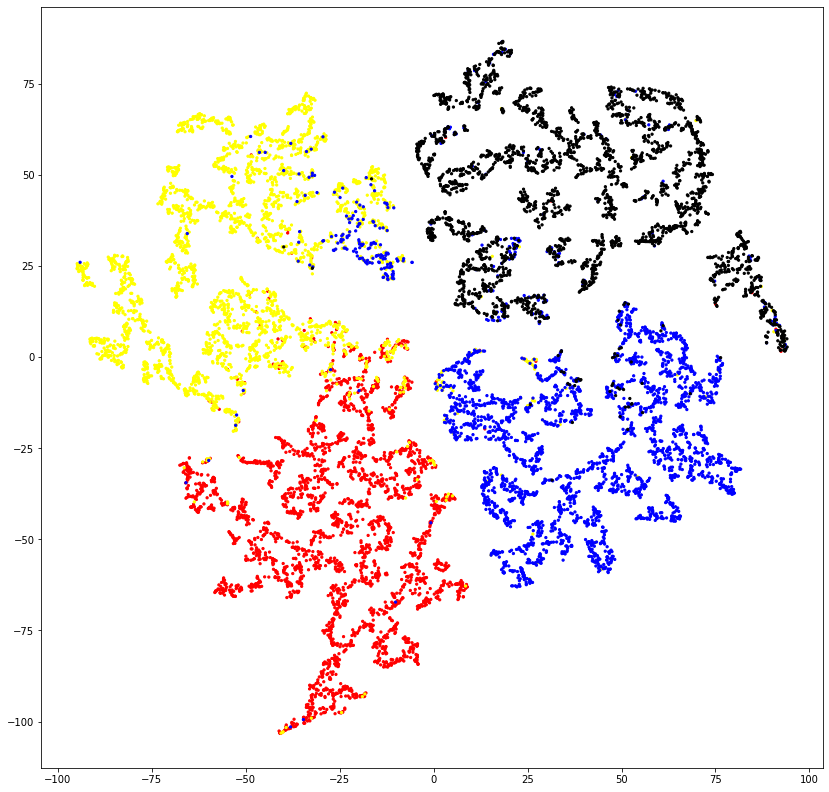

In [114]:
plt.figure(figsize=(6,6))
plt.scatter(X_embedded[:,0],X_embedded[:,1],s=5,color=[ color_tg[i] for i in tagnames])